In [84]:
# !pip install openpyxl  
import os
import pandas as pd 
import numpy as np 
import matplotlib.pylab as plt
import matplotlib.pyplot as plt 


plt.style.use('fivethirtyeight') 

import seaborn as sns 
sns.set_style('darkgrid')

%matplotlib inline

%pip install scikit-learn  --upgrade --force
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Reading
#df01 = pd.read_csv("MasterFile_6-1-23.csv", index_col=0)
dfML = pd.read_csv("MasterFile_6-1-23.csv" )





# !pip install openpyxl  
import os
import pandas as pd 
import numpy as np 
import matplotlib.pylab as plt
import matplotlib.pyplot as plt 


plt.style.use('fivethirtyeight') 
import seaborn as sns 
sns.set_style('darkgrid')
from matplotlib import style
%matplotlib inline


from statistics import mean

%pip install scikit-learn  --upgrade --force
%pip install xgboost
%pip install lightgbm



# ML 
from sklearn.linear_model import LinearRegression 
from sklearn import linear_model
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import (TimeSeriesSplit, KFold, StratifiedKFold, GroupKFold, StratifiedGroupKFold)

import lightgbm as lgb



  Using cached scikit_learn-1.2.2-cp311-cp311-win_amd64.whl (8.3 MB)
  Using cached numpy-1.24.3-cp311-cp311-win_amd64.whl (14.8 MB)
  Using cached scipy-1.10.1-cp311-cp311-win_amd64.whl (42.2 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.1.0
    Uninstalling threadpoolctl-3.1.0:
      Successfully uninstalled threadpoolctl-3.1.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
  Attempting uninstall: scikit-learn
    Found existing

In [85]:
dfML

,Year_Obv,States,DB_Values,DB_Low,DB_High,OB_Values,OB_Low,OB_High,HD_Values,HD_Low,HD_High,HC_Values,HC_Low,HC_High,HBP_Values,HBP_Low,HBP_High,TargetStroke
0,2017Tracts1,AK1,7.4,6.9,7.8,36.3,35.0,37.6,4.2,3.9,4.6,32.3,31.1,33.4,32.3,30.7,34.0,2.2
1,2017Tracts2,AK2,8.9,8.3,9.6,33.5,32.1,34.7,4.7,4.5,5.0,33.0,32.4,33.6,28.3,26.8,29.8,2.2
2,2017Tracts3,AK3,8.2,7.8,8.6,39.0,38.2,39.8,5.8,5.2,6.4,31.9,31.3,32.4,33.8,32.4,35.1,2.2
3,2017Tracts4,AK4,6.1,5.4,6.8,33.4,32.0,34.8,4.4,4.1,4.8,29.3,28.5,30.2,27.4,26.7,28.1,2.2
4,2017Tracts5,AK5,7.3,6.7,7.9,33.2,31.5,34.6,4.0,3.6,4.4,31.4,30.6,32.2,33.0,32.4,33.6,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27999,2017Tracts28000,WY28000,9.0,8.2,9.9,28.9,27.6,30.3,3.3,2.9,3.6,29.4,28.6,30.1,20.8,20.0,21.7,2.8
28000,2017Tracts28001,WY28001,7.4,6.9,7.9,29.7,28.4,31.0,4.9,4.4,5.4,30.8,29.8,31.9,32.5,31.0,34.0,3.2
28001,2017Tracts28002,WY28002,8.9,8.1,9.7,28.4,26.9,29.8,6.7,5.9,7.5,32.9,31.9,33.9,31.3,30.1,32.6,3.0
28002,2017Tracts28003,WY28003,9.1,8.3,9.9,27.2,26.0,28.4,5.2,4.7,5.7,31.6,30.7,32.5,31.9,30.7,33.1,2.3


Building an isolation Forest Model to visualize outliers.

### Cal. each quantile to visulize the upper and lower quantiles.


In [86]:
q01 = dfML['DB_Values'] .quantile(0.90)
q02 = dfML['DB_Values'] .quantile(0.01)
q03 = dfML['DB_Low'] .quantile(0.90)
q04 =  dfML['DB_Low'] .quantile(0.01)
q05 = dfML['DB_High'] .quantile(0.90)
q06 = dfML['DB_High'] .quantile(0.01)

q07 =  dfML['OB_Values'] .quantile(0.95)
q08 =  dfML['OB_Values'] .quantile(0.01)
q09 =  dfML['OB_Low'] .quantile(0.95)
q10 =  dfML['OB_Low'] .quantile(0.01)
q11 =  dfML['OB_High'] .quantile(0.95)
q12 =  dfML['OB_High'] .quantile(0.01)


q13 =  dfML['HC_Values'] .quantile(0.95)
q14 =  dfML['HC_Values'] .quantile(0.2)
q15 =  dfML['HC_Low'] .quantile(0.95)
q16 =  dfML['HC_Low'] .quantile(0.02)
q17 =  dfML['HC_High'] .quantile(0.95)
q18 =  dfML['HC_High'] .quantile(0.02)


q19 =  dfML['HD_Values'] .quantile(0.90)
q20 =  dfML['HD_Values'] .quantile(0.01)
q21 = dfML['HD_Low'] .quantile(0.90)
q22 =  dfML['HD_Low'] .quantile(0.01)
q23 =  dfML['HD_High'] .quantile(0.90)
q24 =  dfML['HD_High'] .quantile(0.01)

q25 =  dfML['HBP_Values'] .quantile(0.90)
q26 = dfML['HBP_Values'] .quantile(0.02)
q27 =  dfML['HBP_Low'] .quantile(0.89)
q28 =  dfML['HBP_Low'] .quantile(0.02)
q29 =  dfML['HBP_High'] .quantile(0.89)
q30 = dfML['HBP_High'] .quantile(0.02)

q31 = dfML['TargetStroke'].quantile(0.77)
q32 = dfML['TargetStroke'].quantile(0.04)
#q31 = dfML['TargetStroke'].quantile(0.77)
#q32 = dfML['TargetStroke'].quantile(0.03)

In [87]:
print(q31)
print(q32)

3.5
1.5


### Extacting and Trimming the outliers

In [88]:
df = dfML[(dfML['DB_Values'] >=q02 ) & (dfML['DB_Values'] <= q01) &
        (dfML['DB_Low'] >= q04) & (dfML['DB_Low'] <= q03) & 
        (dfML['DB_High'] >= q06) &  (dfML['DB_High'] <= q05) &
        (dfML['OB_Values'] >= q08) &  (dfML['OB_Values'] <= q07) &
        (dfML['OB_Low'] >= q10) &  (dfML['OB_Low'] <= q09) &
        (dfML['OB_High'] >= q12) & (dfML['OB_High'] <= q11) &
        (dfML['HC_Values'] >= q14) & (dfML['HC_Values'] <= q13) &
        (dfML['HC_Low'] >= q16) & (dfML['HC_Low'] <= q15) &
        (dfML['HC_High'] >= q18) & (dfML['HC_High'] <= q17) &
        (dfML['HD_Values'] >= q20) & (dfML['HD_Values'] <= q19) &
        (dfML['HD_Low'] >= q22) & (dfML['HD_Low'] <= q21) &
        (dfML['HD_High'] >= q24) & (dfML['HD_High'] <= q23) & 
        (dfML['HBP_Values'] >= q26) & (dfML['HBP_Values'] <= q25) &
        (dfML['HBP_Low'] >= q28) & (dfML['HBP_Low'] <=q27) & 
        (dfML['HBP_High'] >= q30) & (dfML['HBP_High'] <= q29) &
        (dfML['TargetStroke'] >= q32) & (dfML['TargetStroke'] <=q31) ]


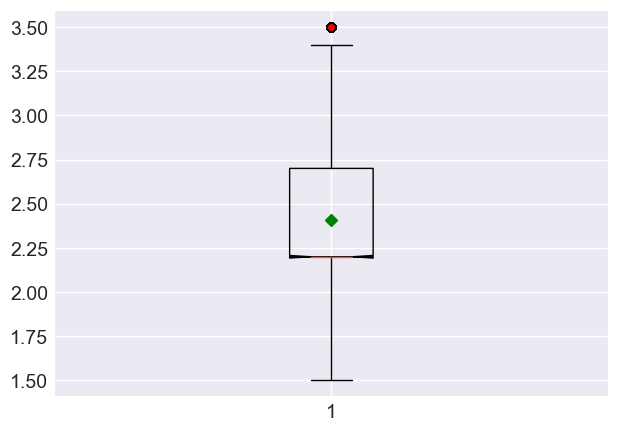

In [89]:
red_circle = dict(markerfacecolor='red', marker='o') ## outliers
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green') ## 

plt.boxplot(x=df['TargetStroke'], vert=True, flierprops=red_circle, showmeans=True, meanprops=mean_shape, notch=True);

In [90]:
df.columns

Index(['Year_Obv', 'States', 'DB_Values', 'DB_Low', 'DB_High', 'OB_Values',
       'OB_Low', 'OB_High', 'HD_Values', 'HD_Low', 'HD_High', 'HC_Values',
       'HC_Low', 'HC_High', 'HBP_Values', 'HBP_Low', 'HBP_High',
       'TargetStroke'],
      dtype='object')

In [91]:
# dropping for pairplot visualization below only - not for other parameters.
df_Dp = df.drop(columns=['Year_Obv','States','DB_Low','OB_Low', 'HD_Low', 'HC_Low', 'HBP_Low','DB_High', 'OB_High', 'HD_High', 'HC_High', 'HBP_High', 'TargetStroke'])
dfML_01 = df_Dp.rename(columns={'DB_Values':'DB', 'DB_Low':'DBLo', 'DB_High':'DBHx', 'OB_Values':'OB', 'OB_Low':'OBLo', 'OB_High':'OBHx',  'HC_Values':'HC', 'HC_Low':'HCLo',  'HC_High':'HCHx',  'HD_Values':'HD',   'HD_Low':'HDLo',  'HD_High':'HDHx', 'HBP_Values':'HBP', 'HBP_Low':'HBPLo','HBP_High':'HBPHx','TargetStroke':'Target' })

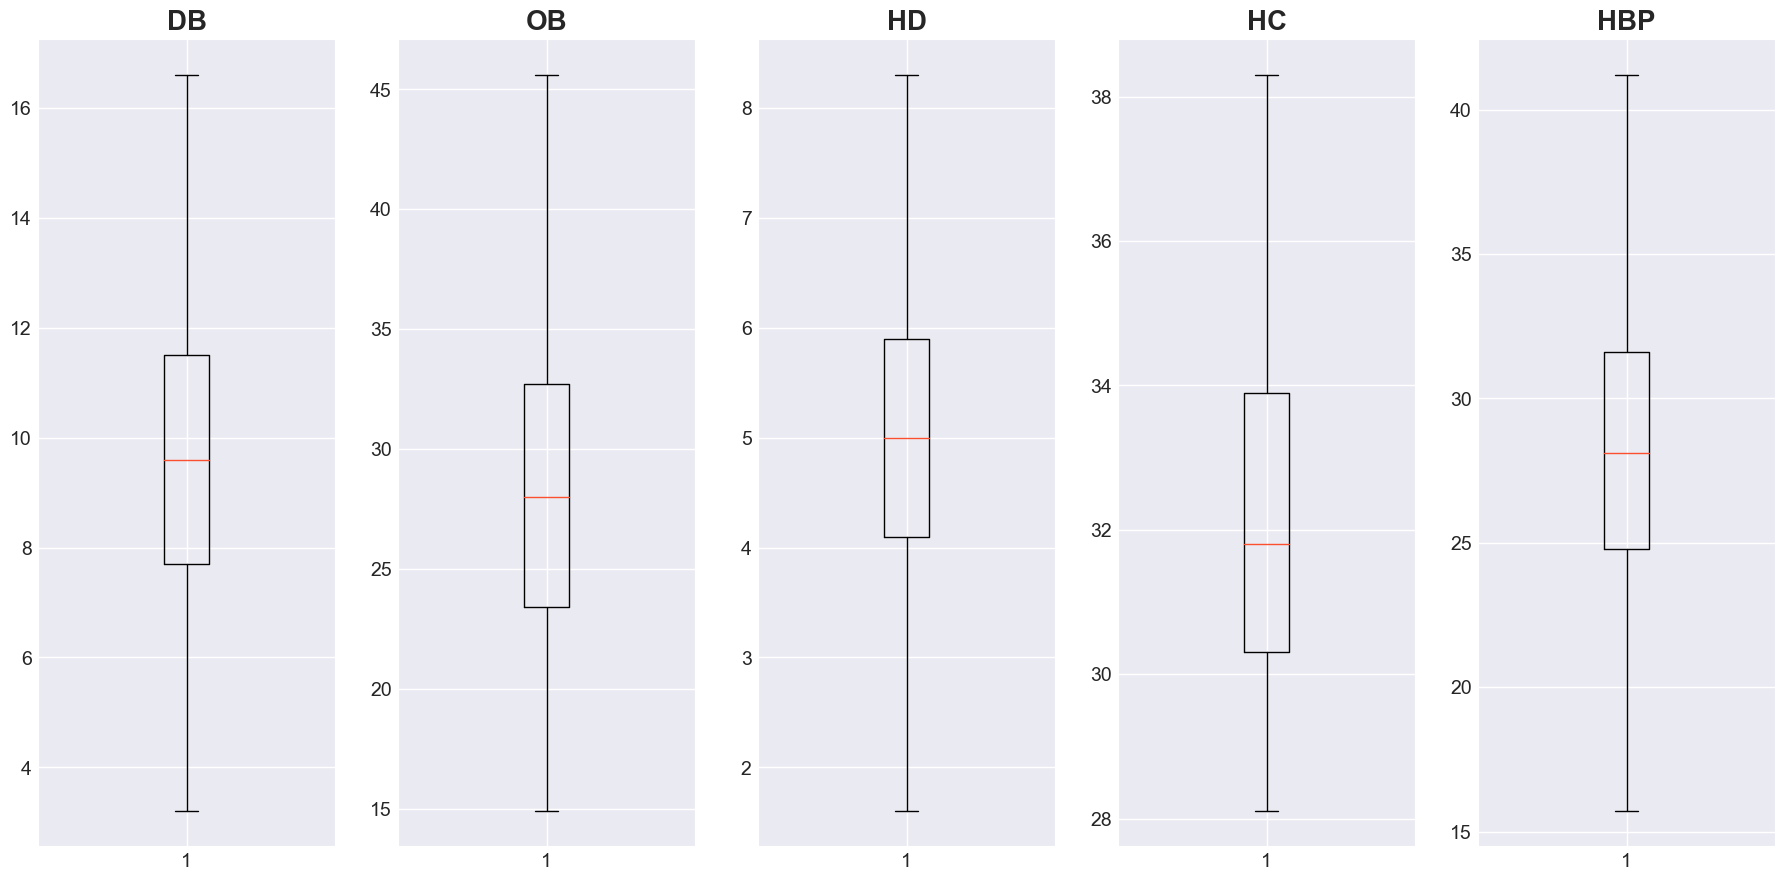

In [92]:
#Subplot

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
fig, axs = plt.subplots(1, len(dfML_01.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(dfML_01.iloc[:,i], flierprops=red_circle) # exclude row#0 and #1
    ax.set_title(dfML_01.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
plt.show()

### ML dataframe without outliers. 

In [93]:
df_Dp

,DB_Values,OB_Values,HD_Values,HC_Values,HBP_Values
0,7.4,36.3,4.2,32.3,32.3
1,8.9,33.5,4.7,33.0,28.3
2,8.2,39.0,5.8,31.9,33.8
3,6.1,33.4,4.4,29.3,27.4
4,7.3,33.2,4.0,31.4,33.0
...,...,...,...,...,...
27999,9.0,28.9,3.3,29.4,20.8
28000,7.4,29.7,4.9,30.8,32.5
28001,8.9,28.4,6.7,32.9,31.3
28002,9.1,27.2,5.2,31.6,31.9


ML without  Outliers

ML - Linear Regression without Outliers.

Test train split for supervised training.
Using the testing portion to predict how well the model perform

In [94]:
X= df_Dp
y= df['TargetStroke']  # dependent feature (Stroke).
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [95]:

# Fit/load into a model
modelReg = LinearRegression ()
modelReg.fit(X_train,y_train)


LinearRegression()

In [96]:
#=========================================
score_train = modelReg.predict(X_train)
y_pred = modelReg.predict(X_test) 


In [97]:
print(modelReg.score(X_test,y_test))
#print(r2_score(y_test,y_pred)) # the accuracy of the prediction and the different is the errors(SSE).
print('Score', r2_score(y_test,y_pred)) # r2 = SSR / SST
print("r2:{}  ".format(r2_score(y_pred,y_test)))  
print('MAE = ', mean_absolute_error(y_pred,y_test))
print('MAPE = ', mean_absolute_percentage_error(y_pred,y_test))  # Verify error


0.033397390982959685
Score 0.033397390982959685
r2:-19.742764240491514  
MAE =  0.3255791141966994
MAPE =  0.13419253075980261


XGBRegressor ML Model without Outliers.

In [98]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [99]:
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from xgboost import XGBRegressor
modelXGB= XGBRegressor()
modelXGB.fit(X_train,y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [100]:
#=========================================
score_train = modelXGB.predict(X_train)
y_pred = modelXGB.predict(X_test)

In [101]:
print(modelXGB.score(X_test,y_test))
print('Score', r2_score(y_test,y_pred)) # r2 = SSR / SST
print("r2:{}  ".format(r2_score(y_pred,y_test)))  
print('MAE = ', mean_absolute_error(y_pred,y_test))
print('MAPE = ', mean_absolute_percentage_error(y_pred,y_test))  # Verify error

-0.12595648313874896
Score -0.12595648313874896
r2:-4.736486088590682  
MAE =  0.3406952697083664
MAPE =  0.14021032673856024


Decision Tree without Outliers.

In [102]:

modelDT= DecisionTreeRegressor()
modelDT.fit(X_train,y_train)


DecisionTreeRegressor()

In [103]:
#=========================================
score_train = modelDT.predict(X_train)
y_pred = modelDT.predict(X_test) 

In [104]:
print('Score', r2_score(y_test,y_pred))
print("r2:{}  ".format(r2_score(y_pred,y_test)))  
#print("mae:{}  ".format(mean_absolute_error(y_pred,y_test)))
print('MAE= ', mean_absolute_error(y_pred,y_test))
print('MAPE = ', mean_absolute_percentage_error(y_pred,y_test))  # Verify error



Score -1.1131591902731608
r2:-0.7874010014729771  
MAE=  0.44286983562860943
MAPE =  0.18167655209382338


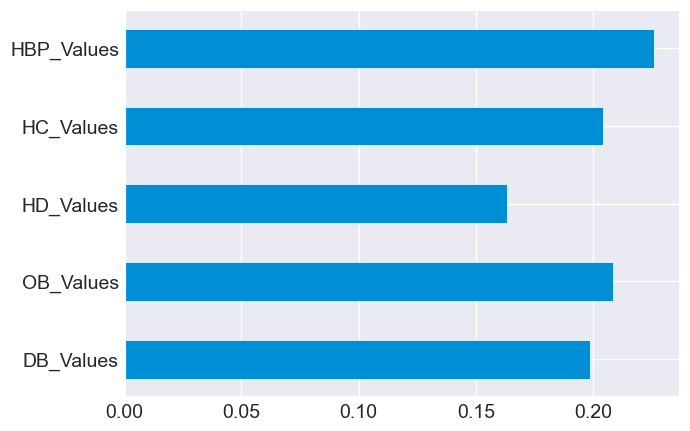

In [105]:
model_ranks=pd.Series(modelDT.feature_importances_,index=X_train.columns,name='Importance')
ax=model_ranks.plot(kind='barh')

RandomForestRegressor without Outliers.

In [106]:

modelRF = RandomForestRegressor(n_estimators=20, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
modelRF.fit(X_train,y_train)


RandomForestRegressor(n_estimators=20, random_state=1)

In [107]:
#=========================================
score_train = modelRF.predict(X_train)
y_pred = modelRF.predict(X_test)

In [108]:
print('Score', r2_score(y_test,y_pred))
print("r2:{}  ".format(r2_score(y_pred,y_test)))  
#print("mae:{}  ".format(mean_absolute_error(y_pred,y_test)))
print('MAE = ', mean_absolute_error(y_pred,y_test))
print('MAPE = ', mean_absolute_percentage_error(y_pred,y_test))  # Verify error
print('MSE', mean_squared_error(y_test,y_pred))


Score -0.0651414212999537
r2:-5.898899145365433  
MAE =  0.34201688138605063
MAPE =  0.13952803744986542
MSE 0.19980446468236335


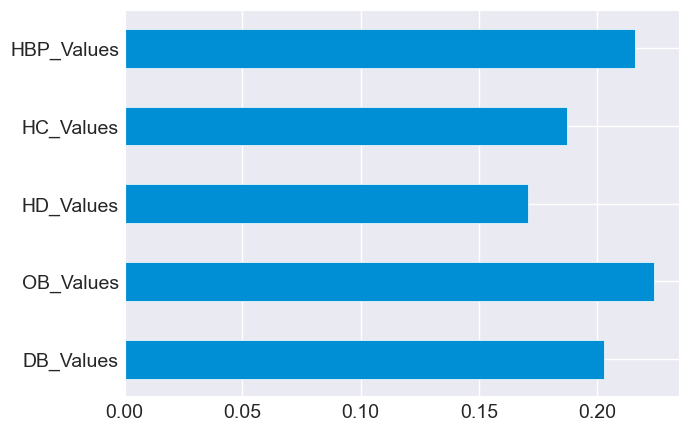

In [109]:
model_ranks=pd.Series(modelRF.feature_importances_,index=X_train.columns,name='Importance')
ax=model_ranks.plot(kind='barh')

ML with outliers 

In [110]:
# !pip install openpyxl  
import os
import pandas as pd 
import numpy as np 
import matplotlib.pylab as plt
import matplotlib.pyplot as plt 


plt.style.use('fivethirtyeight') 

import seaborn as sns 
sns.set_style('darkgrid')

%matplotlib inline

%pip install scikit-learn  --upgrade --force
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Reading

dfML_OL = pd.read_csv("MasterFile_6-1-23.csv" )




# !pip install openpyxl  
import os
import pandas as pd 
import numpy as np 
import matplotlib.pylab as plt
import matplotlib.pyplot as plt 


plt.style.use('fivethirtyeight') 
import seaborn as sns 
sns.set_style('darkgrid')
from matplotlib import style
%matplotlib inline


from statistics import mean

%pip install scikit-learn  --upgrade --force
%pip install xgboost
%pip install lightgbm



# ML 
from sklearn.linear_model import LinearRegression 
from sklearn import linear_model
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import (TimeSeriesSplit, KFold, StratifiedKFold, GroupKFold, StratifiedGroupKFold)

import lightgbm as lgb


  Using cached scikit_learn-1.2.2-cp311-cp311-win_amd64.whl (8.3 MB)
  Using cached numpy-1.24.3-cp311-cp311-win_amd64.whl (14.8 MB)
  Using cached scipy-1.10.1-cp311-cp311-win_amd64.whl (42.2 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.1.0
    Uninstalling threadpoolctl-3.1.0:
      Successfully uninstalled threadpoolctl-3.1.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
  Attempting uninstall: scikit-learn
    Found existing

In [111]:
dfML_OL.columns

Index(['Year_Obv', 'States', 'DB_Values', 'DB_Low', 'DB_High', 'OB_Values',
       'OB_Low', 'OB_High', 'HD_Values', 'HD_Low', 'HD_High', 'HC_Values',
       'HC_Low', 'HC_High', 'HBP_Values', 'HBP_Low', 'HBP_High',
       'TargetStroke'],
      dtype='object')

In [112]:
dfML01 = dfML_OL.drop(columns=['Year_Obv', 'States', 'DB_Low', 'DB_High', 'OB_Low', 'OB_High', 'HD_Low', 'HD_High', 'HC_Low', 'HC_High', 'HBP_Low', 'HBP_High' ])

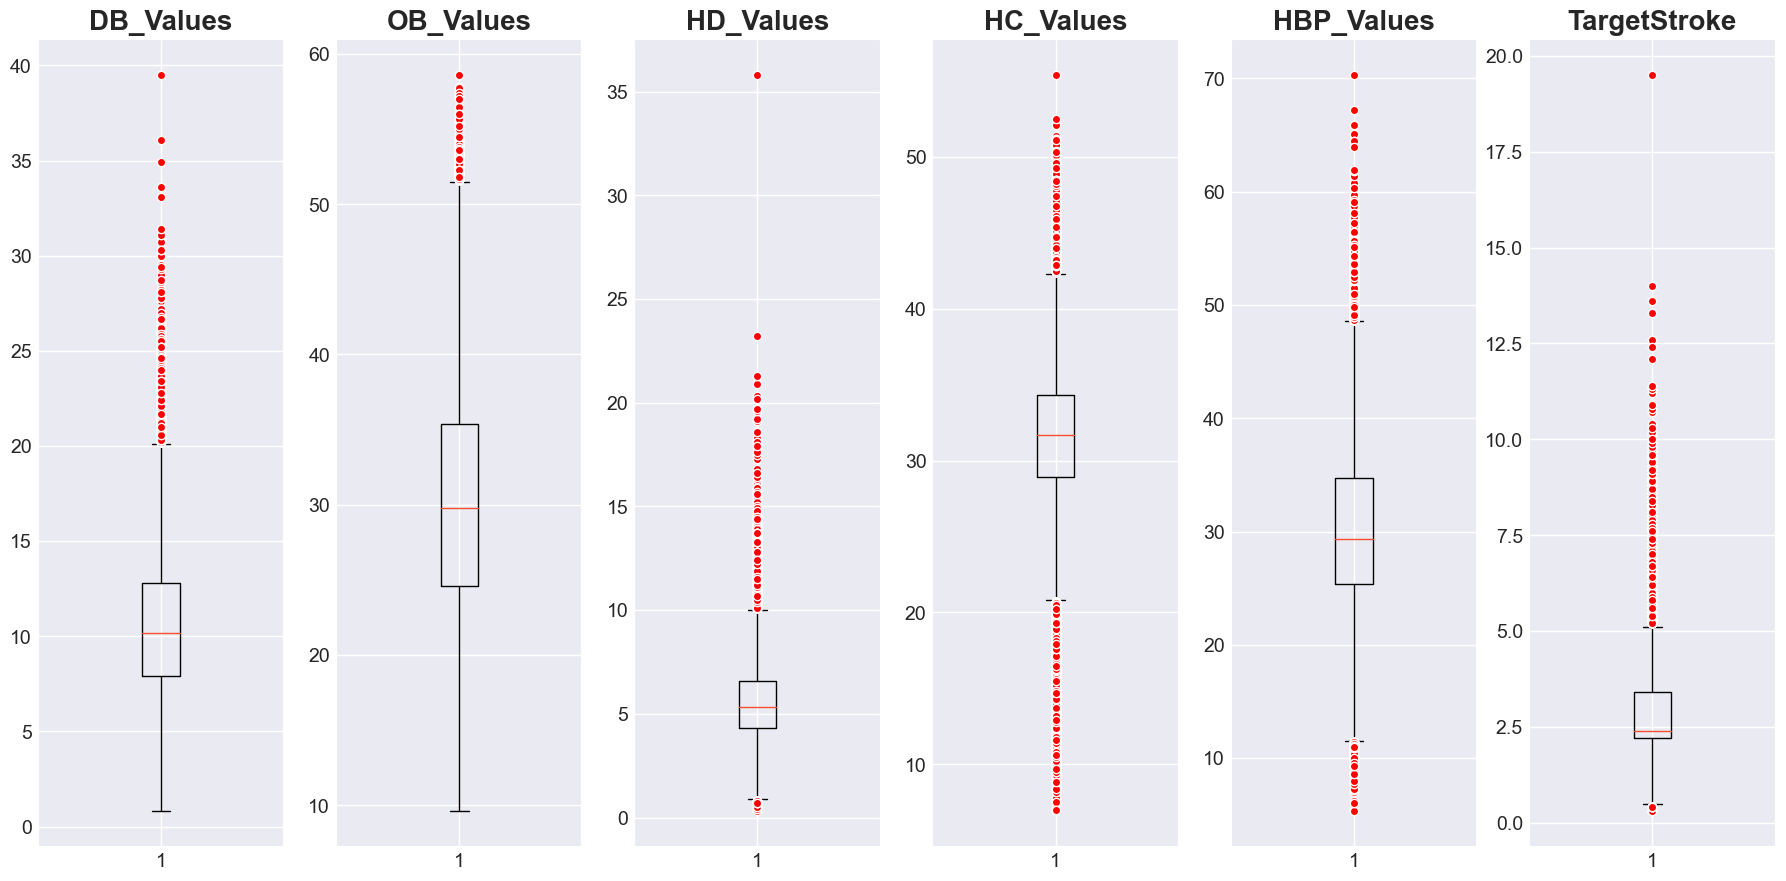

In [113]:
#Subplot

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
fig, axs = plt.subplots(1, len(dfML01.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(dfML01.iloc[:,i], flierprops=red_circle) # exclude row#0 and #1
    ax.set_title(dfML01.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
plt.show()

ML with outliers.

In [114]:
X= dfML01.iloc[:, :-1]
y= dfML01.iloc[:, -1] # dependent feature (Stroke).

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

LINEAR REGRESSION ML

In [115]:
# Fit/load into a model - new_model = LinearRegression().fit(x, y.reshape((-1, 1)))
modelReg = LinearRegression ().fit(X_train, y_train)



In [116]:

#Get results - obtain the coefficient of determination, 𝑅², with .score() called on model:
r_sq = modelReg.score(X, y)
print(f"Coefficient of determination: {r_sq}")

print()
print()

print(f"Intercept: {modelReg.intercept_}")
print(f"Slope: {modelReg.coef_}")

print()
print()

#Predict on training set.
score_train = modelReg.predict(X_train)
print(f"Predicted response on training set:\n{score_train}")

print()
print()
#When applying .predict() and pass the regressor as the argument
#the corresponding predicted response. 
y_pred = modelReg.intercept_ + modelReg.coef_ * X
print(f"The corresponding predicted response:\n{y_pred}")

print()


Coefficient of determination: 0.07659404660359292


Intercept: 0.838933717163103
Slope: [0.02413548 0.02611291 0.05040758 0.00673021 0.0186114 ]


Predicted response on training set:
[2.56038936 3.05244562 2.23866253 ... 3.57342371 2.529161   2.56404893]


The corresponding predicted response:
       DB_Values  OB_Values  HD_Values  HC_Values  HBP_Values
0       1.017536   1.786832   1.050646   1.056320    1.440082
1       1.053740   1.713716   1.075849   1.061031    1.365636
2       1.036845   1.857337   1.131298   1.053628    1.467999
3       0.986160   1.711105   1.060727   1.036129    1.348886
4       1.015123   1.705882   1.040564   1.050262    1.453110
...          ...        ...        ...        ...         ...
27999   1.056153   1.593597   1.005279   1.036802    1.226051
28000   1.017536   1.614487   1.085931   1.046224    1.443804
28001   1.053740   1.580540   1.176665   1.060358    1.421471
28002   1.058567   1.549205   1.101053   1.051608    1.432637
28003   1.039258   1.55

In [117]:

#Predict on Testing set.
y_pred = modelReg.predict(X_test)
print('Score = ', modelReg.score(X_test,y_test))

#print(r2_score(y_test,y_pred)) # the accuracy of the prediction and the different is the errors(SSE).
print('r2 Score', r2_score(y_test,y_pred)) # r2 = SSR / SST
print("r2:{}  ".format(r2_score(y_pred,y_test)))  

#print("mae:{}  ".format(mean_absolute_error(y_pred,y_test)))
print('MAE = ', mean_absolute_error(y_pred,y_test))
print('MAPE = ', mean_absolute_percentage_error(y_pred,y_test))  # Verify error

Score =  0.07639507813686464
r2 Score 0.07639507813686464
r2:-11.344399091047867  
MAE =  0.9209217259688991
MAPE =  0.3041527348718407


With log transform 

In [118]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [119]:
X= dfML01.iloc[:, :-1]
y= dfML01.iloc[:, -1] # dependent feature (Stroke).

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [120]:
trf = FunctionTransformer = FunctionTransformer(func=np.log1p)

In [121]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.fit_transform(X_test)

In [122]:
modelReg = LinearRegression ().fit(X_train_transformed, y_train)

In [123]:
y_pred = modelReg.predict(X_test_transformed)


In [124]:
print('r2 Score', r2_score(y_test,y_pred))

r2 Score 0.07874328944995546


XGBRegressor ML Model

In [125]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [126]:
from xgboost import XGBRegressor

In [127]:

# Fit/load into a model - new_model = LinearRegression().fit(x, y.reshape((-1, 1)))
modelXGB= XGBRegressor().fit(X_train, y_train)

In [128]:

#Get results - obtain the coefficient of determination, 𝑅², with .score() called on model:
r_sq = modelXGB.score(X, y)
r_sq
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.325572127995975


In [129]:
#Predict on training set.
score_train = modelXGB.predict(X_train)
print(f"predicted response:\n{score_train}")

predicted response:
[4.2914953 3.1870217 3.0437174 ... 3.0158262 2.5062232 3.5843186]


In [130]:

#Predict on Testing set.
y_pred = modelXGB.predict(X_test)
print('Score', modelXGB.score(X_test,y_test))

#print(r2_score(y_test,y_pred)) # the accuracy of the prediction and the different is the errors(SSE).
print('r2 Score', r2_score(y_test,y_pred)) # r2 = SSR / SST
print("r2:{}  ".format(r2_score(y_pred,y_test)))  

#print("mae:{}  ".format(mean_absolute_error(y_pred,y_test)))
print('MAE = ', mean_absolute_error(y_pred,y_test))
print('MAPE = ', mean_absolute_percentage_error(y_pred,y_test))  # Verify error

Score 0.0012450466881962496
r2 Score 0.0012450466881962496
r2:-4.481595319617022  
MAE =  0.9343853449102087
MAPE =  0.3035800216463439


ML Analyzing using - Decision Tree Model.




In [131]:
# Fit/load into a model - new_model = LinearRegression().fit(x, y.reshape((-1, 1)))
modelDT= DecisionTreeRegressor().fit(X_train, y_train)


In [132]:
#Get results - obtain the coefficient of determination, 𝑅², with .score() called on model:
r_sq = modelDT.score(X, y)
print(f"coefficient of determination: {r_sq}")

print()
print()

#Predict on training set.
score_train = modelDT.predict(X_train)
print(f"predicted response on training set:\n{score_train}")


coefficient of determination: 0.5898864214342519


predicted response on training set:
[3.6 2.4 2.2 ... 1.8 2.7 2.5]


In [133]:

#Predict on Testing set.
y_pred = modelDT.predict(X_test)
print('Score = ', modelDT.score(X_test,y_test))

print()

print('r2 Score', r2_score(y_test,y_pred)) # r2 = SSR / SST
print("r2:{}  ".format(r2_score(y_pred,y_test)))  

#print("mae:{}  ".format(mean_absolute_error(y_pred,y_test)))
print('MAE = ', mean_absolute_error(y_pred,y_test))
print('MAPE = ', mean_absolute_percentage_error(y_pred,y_test))  # Verify erro

Score =  -1.0350081478524311

r2 Score -1.0350081478524311
r2:-0.6397146870951431  
MAE =  1.2969826816639884
MAPE =  0.45255175345816306


RandomForestRegressor ML

In [134]:

modelRF = RandomForestRegressor(n_estimators=30, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

modelRF.fit(X_train,y_train)


RandomForestRegressor(n_estimators=30, random_state=1)

In [135]:

#Get results - obtain the coefficient of determination, 𝑅², with .score() called on model:
r_sq = modelRF.score(X, y)
print(f"coefficient of determination: {r_sq}")

print()
print()

#Predict on training set.
score_train = modelRF.predict(X_train)
print(f"predicted response on training set:\n{score_train}")




coefficient of determination: 0.6621705182301731


predicted response on training set:
[4.30666667 2.34       2.02666667 ... 2.16333333 2.25666667 2.60333333]


In [136]:

#Predict on Testing set.
y_pred = modelRF.predict(X_test)
print('Score'  , modelRF.score(X_test,y_test))

print()

#print(r2_score(y_test,y_pred)) # the accuracy of the prediction and the different is the errors(SSE).
print('r2 Score', r2_score(y_test,y_pred)) # r2 = SSR / SST
print("r2:{}  ".format(r2_score(y_pred,y_test)))  

#print("mae:{}  ".format(mean_absolute_error(y_pred,y_test)))
print('MAE = ', mean_absolute_error(y_pred,y_test))
print('MAPE = ', mean_absolute_percentage_error(y_pred,y_test))  # Verify error

Score -0.00031296125352331394

r2 Score -0.00031296125352331394
r2:-5.498685923006304  
MAE =  0.9903445813247634
MAPE =  0.31925814163630983
